# 1. Data Understanding

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
import warnings

In [97]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [99]:
production_log_df= pd.read_csv('C:/Users/sujee/Desktop/HFU Class Notes/Holger Ziekow/Production_Log_01.csv')
production_log_df.head()

,id,width,height,ionizationclass,FluxCompensation,pressure,karma,modulation,configuration_log_ID,weight_in_kg,weight_in_g,error,error_type,Quality,reflectionScore,distortion,nicesness,smartness,multideminsionality,roughness
0,1,137.419169,44.326218,C,IV,103.937207,976.538993,98.309438,1,837068.270898,8.370683e+08,no,NaN,95.489138,703.193051,49.666361,139.496837,2964.217002,no,123.202181
1,2,98.706037,41.619531,A,II,101.177877,1031.806826,102.748068,2,435504.324849,4.355043e+08,no,NaN,98.262642,663.936149,52.826310,100.380138,2733.298369,yes,111.040858
2,3,117.262568,41.421088,A,III,99.381956,840.246668,99.451354,3,599570.696236,5.995707e+08,no,NaN,98.472489,674.814037,51.967423,115.995772,2716.279965,no,138.439571
3,4,122.657252,41.202308,A,I,101.833664,964.391122,101.022948,4,649889.744140,6.498897e+08,no,NaN,97.107023,661.281569,47.626823,121.383895,2694.883523,no,125.939831
4,5,118.085366,43.418485,C,I,95.246304,859.331870,97.698503,5,605444.403997,6.054444e+08,no,NaN,92.994235,684.026152,47.420237,118.633440,2885.260257,no,135.123613


In [101]:
production_log_df.tail()

,id,width,height,ionizationclass,FluxCompensation,pressure,karma,modulation,configuration_log_ID,weight_in_kg,weight_in_g,error,error_type,Quality,reflectionScore,distortion,nicesness,smartness,multideminsionality,roughness
9995,9996,98.693482,43.223126,B,IV,95.557115,1074.422817,103.228564,9996,421022.149401,4.210221e+08,no,NaN,95.096684,665.023189,49.621868,97.779998,2868.383993,no,129.190408
9996,9997,80.361968,42.414173,C,IV,105.874139,922.783752,100.698130,9997,273921.656401,2.739217e+08,no,NaN,92.894512,683.713065,50.972047,79.091321,2798.138494,no,123.402367
9997,9998,104.020139,43.071501,B,II,96.444678,1080.351218,101.673757,9998,466053.196545,4.660532e+08,yes,severe,95.870445,704.597525,48.441531,104.778601,2854.847092,no,134.118454
9998,9999,114.292997,44.874431,C,II,98.550208,949.594801,97.181766,9999,586199.631156,5.861996e+08,no,NaN,97.984355,677.084683,50.438536,116.285367,3014.817737,no,122.684090
9999,10000,125.464681,44.617698,A,IV,101.672477,1009.498233,98.465138,10000,732353.574160,7.323536e+08,no,NaN,97.952732,750.857354,51.405153,125.225228,2990.215773,yes,139.507019


In [103]:
machine_settings_df= pd.read_csv('C:/Users/sujee/Desktop/HFU Class Notes/Holger Ziekow/Machine_Settings_Log_01.csv')
machine_settings_df.head()

,configuration_log_ID,gear,rotation_speed
0,1,2,122.121415
1,2,1,111.977476
2,3,1,137.268544
3,4,2,125.719071
4,5,1,134.710713


In [105]:
machine_settings_df.tail()

,configuration_log_ID,gear,rotation_speed
9995,9996,1,130.355163
9996,9997,1,122.937046
9997,9998,1,131.985706
9998,9999,2,121.198563
9999,10000,2,138.430947


# 2.Data Preprocessing

In [108]:
df_merged = pd.merge(production_log_df,machine_settings_df, on='configuration_log_ID', how='inner')
df_merged.head()

,id,width,height,ionizationclass,FluxCompensation,pressure,karma,modulation,configuration_log_ID,weight_in_kg,weight_in_g,error,error_type,Quality,reflectionScore,distortion,nicesness,smartness,multideminsionality,roughness,gear,rotation_speed
0,1,137.419169,44.326218,C,IV,103.937207,976.538993,98.309438,1,837068.270898,8.370683e+08,no,NaN,95.489138,703.193051,49.666361,139.496837,2964.217002,no,123.202181,2,122.121415
1,2,98.706037,41.619531,A,II,101.177877,1031.806826,102.748068,2,435504.324849,4.355043e+08,no,NaN,98.262642,663.936149,52.826310,100.380138,2733.298369,yes,111.040858,1,111.977476
2,3,117.262568,41.421088,A,III,99.381956,840.246668,99.451354,3,599570.696236,5.995707e+08,no,NaN,98.472489,674.814037,51.967423,115.995772,2716.279965,no,138.439571,1,137.268544
3,4,122.657252,41.202308,A,I,101.833664,964.391122,101.022948,4,649889.744140,6.498897e+08,no,NaN,97.107023,661.281569,47.626823,121.383895,2694.883523,no,125.939831,2,125.719071
4,5,118.085366,43.418485,C,I,95.246304,859.331870,97.698503,5,605444.403997,6.054444e+08,no,NaN,92.994235,684.026152,47.420237,118.633440,2885.260257,no,135.123613,1,134.710713


In [110]:
df_merged.tail()

,id,width,height,ionizationclass,FluxCompensation,pressure,karma,modulation,configuration_log_ID,weight_in_kg,weight_in_g,error,error_type,Quality,reflectionScore,distortion,nicesness,smartness,multideminsionality,roughness,gear,rotation_speed
9995,9996,98.693482,43.223126,B,IV,95.557115,1074.422817,103.228564,9996,421022.149401,4.210221e+08,no,NaN,95.096684,665.023189,49.621868,97.779998,2868.383993,no,129.190408,1,130.355163
9996,9997,80.361968,42.414173,C,IV,105.874139,922.783752,100.698130,9997,273921.656401,2.739217e+08,no,NaN,92.894512,683.713065,50.972047,79.091321,2798.138494,no,123.402367,1,122.937046
9997,9998,104.020139,43.071501,B,II,96.444678,1080.351218,101.673757,9998,466053.196545,4.660532e+08,yes,severe,95.870445,704.597525,48.441531,104.778601,2854.847092,no,134.118454,1,131.985706
9998,9999,114.292997,44.874431,C,II,98.550208,949.594801,97.181766,9999,586199.631156,5.861996e+08,no,NaN,97.984355,677.084683,50.438536,116.285367,3014.817737,no,122.684090,2,121.198563
9999,10000,125.464681,44.617698,A,IV,101.672477,1009.498233,98.465138,10000,732353.574160,7.323536e+08,no,NaN,97.952732,750.857354,51.405153,125.225228,2990.215773,yes,139.507019,2,138.430947


In [112]:
df_merged.shape

(10000, 22)

In [114]:
df = df_merged.drop('id', axis=1)

In [116]:
df.head()

,width,height,ionizationclass,FluxCompensation,pressure,karma,modulation,configuration_log_ID,weight_in_kg,weight_in_g,error,error_type,Quality,reflectionScore,distortion,nicesness,smartness,multideminsionality,roughness,gear,rotation_speed
0,137.419169,44.326218,C,IV,103.937207,976.538993,98.309438,1,837068.270898,8.370683e+08,no,NaN,95.489138,703.193051,49.666361,139.496837,2964.217002,no,123.202181,2,122.121415
1,98.706037,41.619531,A,II,101.177877,1031.806826,102.748068,2,435504.324849,4.355043e+08,no,NaN,98.262642,663.936149,52.826310,100.380138,2733.298369,yes,111.040858,1,111.977476
2,117.262568,41.421088,A,III,99.381956,840.246668,99.451354,3,599570.696236,5.995707e+08,no,NaN,98.472489,674.814037,51.967423,115.995772,2716.279965,no,138.439571,1,137.268544
3,122.657252,41.202308,A,I,101.833664,964.391122,101.022948,4,649889.744140,6.498897e+08,no,NaN,97.107023,661.281569,47.626823,121.383895,2694.883523,no,125.939831,2,125.719071
4,118.085366,43.418485,C,I,95.246304,859.331870,97.698503,5,605444.403997,6.054444e+08,no,NaN,92.994235,684.026152,47.420237,118.633440,2885.260257,no,135.123613,1,134.710713


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   width                 10000 non-null  float64
 1   height                10000 non-null  float64
 2   ionizationclass       10000 non-null  object 
 3   FluxCompensation      10000 non-null  object 
 4   pressure              10000 non-null  float64
 5   karma                 10000 non-null  float64
 6   modulation            10000 non-null  float64
 7   configuration_log_ID  10000 non-null  int64  
 8   weight_in_kg          10000 non-null  float64
 9   weight_in_g           10000 non-null  float64
 10  error                 10000 non-null  object 
 11  error_type            3365 non-null   object 
 12  Quality               10000 non-null  float64
 13  reflectionScore       10000 non-null  float64
 14  distortion            10000 non-null  float64
 15  nicesness           

In [120]:
df.describe()

,width,height,pressure,karma,modulation,configuration_log_ID,weight_in_kg,weight_in_g,Quality,reflectionScore,distortion,nicesness,smartness,roughness,gear,rotation_speed
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.000011e+07,42.001636,99.983656,998.816837,100.015683,5000.50000,8.488496e+18,8.488496e+21,96.798205,700.231353,49.976116,2.000011e+07,2768.190110,129.901287,1.501300,129.908329
std,4.467885e+08,2.015463,3.013366,98.810735,2.991423,2886.89568,1.897801e+20,1.897801e+23,1.902019,30.229007,2.013642,4.467885e+08,169.398222,10.164607,0.500023,10.121958
min,3.086553e+01,35.093287,89.049069,663.972927,88.292365,1.00000,3.768185e+04,3.768185e+07,85.970489,596.878104,42.537676,2.903118e+01,2229.733838,90.720215,1.000000,92.670570
25%,9.614221e+01,40.650189,97.909788,932.773088,97.978794,2500.75000,3.965822e+05,3.965822e+08,95.688598,679.756776,48.627449,9.611179e+01,2652.806173,123.096717,1.000000,123.155385
50%,1.098902e+02,42.007901,100.015208,999.537913,100.040526,5000.50000,5.174675e+05,5.174675e+08,97.115630,700.366530,49.969262,1.098927e+02,2764.804004,129.889663,2.000000,129.905092
75%,1.233109e+02,43.360433,102.030866,1065.148985,102.036830,7500.25000,6.502447e+05,6.502447e+08,98.248631,720.757187,51.309910,1.234108e+02,2880.112927,136.656443,2.000000,136.626239
max,1.000000e+10,49.325927,111.628972,1348.612993,110.814048,10000.00000,4.475432e+21,4.475432e+24,99.969521,811.416023,57.704022,1.000000e+10,3433.118457,166.219412,2.000000,166.481616


__Count missing values__

In [123]:
df.isnull().sum()

width                      0
height                     0
ionizationclass            0
FluxCompensation           0
pressure                   0
karma                      0
modulation                 0
configuration_log_ID       0
weight_in_kg               0
weight_in_g                0
error                      0
error_type              6635
Quality                    0
reflectionScore            0
distortion                 0
nicesness                  0
smartness                  0
multideminsionality        0
roughness                  0
gear                       0
rotation_speed             0
dtype: int64

In [125]:
df['error'].unique()

array(['no', 'yes'], dtype=object)

In [127]:
df['error_type'].unique()

array([nan, 'severe', 'minor', 'critical'], dtype=object)

In [129]:
df['error_type'].isnull()
df['error'].value_counts()
df['error_type'].fillna('no_error', inplace=True)

In [131]:
df.isnull().sum()

width                   0
height                  0
ionizationclass         0
FluxCompensation        0
pressure                0
karma                   0
modulation              0
configuration_log_ID    0
weight_in_kg            0
weight_in_g             0
error                   0
error_type              0
Quality                 0
reflectionScore         0
distortion              0
nicesness               0
smartness               0
multideminsionality     0
roughness               0
gear                    0
rotation_speed          0
dtype: int64

In [133]:
df['error_type'].unique()

array(['no_error', 'severe', 'minor', 'critical'], dtype=object)

In [135]:
columns_to_drop = [
    'weight_in_kg', 'weight_in_g', 'Quality', 'reflectionScore',
    'distortion', 'nicesness', 'smartness', 'roughness'
]
df = df.drop(columns=columns_to_drop, axis=1)

__We addressed the missing values in the error_type column by inferring that a NaN value indicated the absence of an error, and thus filled these instances with a new category: 'no_error'.__

>We removed the columns 'weight_in_kg', 'weight_in_g', 'Quality', 'reflectionScore',
    'distortion', 'nicesness', 'smartness', 'roughness'  because they represent properties of the final product, and preventing our model from accurately predicting errors using only information available before production begins.

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   width                 10000 non-null  float64
 1   height                10000 non-null  float64
 2   ionizationclass       10000 non-null  object 
 3   FluxCompensation      10000 non-null  object 
 4   pressure              10000 non-null  float64
 5   karma                 10000 non-null  float64
 6   modulation            10000 non-null  float64
 7   configuration_log_ID  10000 non-null  int64  
 8   error                 10000 non-null  object 
 9   error_type            10000 non-null  object 
 10  multideminsionality   10000 non-null  object 
 11  gear                  10000 non-null  int64  
 12  rotation_speed        10000 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 1015.8+ KB


# 3.Exploratory Data Analysis (EDA)

In [141]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

df[['ionizationclass', 'FluxCompensation', 'multideminsionality', 'error', 'error_type']].dtypes
df['ionizationclass'].value_counts()
df['FluxCompensation'].value_counts()
df['multideminsionality'].value_counts()
df['error'].value_counts()
df['error_type'].value_counts()

# --- 1. Encode 'ionizationclass' (One-Hot Encoding) ---
encoder_ion = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ionization_encoded = encoder_ion.fit_transform(df[['ionizationclass']])
ionization_df = pd.DataFrame(ionization_encoded, columns=encoder_ion.get_feature_names_out(['ionizationclass']), index= df.index)
df = pd.concat([df, ionization_df], axis=1)
df.drop('ionizationclass', axis=1, inplace=True)

df.filter(like='ionizationclass_').head()

,ionizationclass_A,ionizationclass_B,ionizationclass_C
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0


In [143]:
# --- 2. Encode 'FluxCompensation' 
flux_order = ['I', 'II', 'III', 'IV']

flux_mapping = {category: i for i, category in enumerate(flux_order)}
df['FluxCompensation_encoded'] = df['FluxCompensation'].map(flux_mapping)
df.drop('FluxCompensation', axis=1, inplace=True)

df[['FluxCompensation_encoded']].head()
df['FluxCompensation_encoded'].value_counts()

FluxCompensation_encoded
3    2526
2    2501
0    2494
1    2479
Name: count, dtype: int64

In [145]:
# --- 3. Encode 'multideminsionality' (Label Encoding) ---
encoder_multi = LabelEncoder()
df['multideminsionality_encoded'] = encoder_multi.fit_transform(df['multideminsionality'])
df.drop('multideminsionality', axis=1, inplace=True)

print("Mapping:", dict(zip(encoder_multi.classes_, encoder_multi.transform(encoder_multi.classes_))))
df[['multideminsionality_encoded']].head()

Mapping: {'no': 0, 'yes': 1}


,multideminsionality_encoded
0,0
1,1
2,0
3,0
4,0


In [147]:
# --- 4. Encode 'error' (Label Encoding) ---
encoder_error = LabelEncoder()
df['error_encoded'] = encoder_error.fit_transform(df['error'])
df.drop('error', axis=1, inplace=True)

print("Mapping:", dict(zip(encoder_error.classes_, encoder_error.transform(encoder_error.classes_))))
df[['error_encoded']].head()

Mapping: {'no': 0, 'yes': 1}


,error_encoded
0,0
1,0
2,0
3,0
4,0


In [149]:
# --- 5. Encode 'error_type' (Target Variable - Label Encoding) ---
encoder_error_type = LabelEncoder()
df['error_type_encoded'] = encoder_error_type.fit_transform(df['error_type'])

print("Mapping (error_type to integer):", dict(zip(encoder_error_type.classes_, encoder_error_type.transform(encoder_error_type.classes_))))
df[['error_type', 'error_type_encoded']].head()
df['error_type_encoded'].value_counts()

Mapping (error_type to integer): {'critical': 0, 'minor': 1, 'no_error': 2, 'severe': 3}


error_type_encoded
2    6635
0    1186
1    1097
3    1082
Name: count, dtype: int64

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   width                        10000 non-null  float64
 1   height                       10000 non-null  float64
 2   pressure                     10000 non-null  float64
 3   karma                        10000 non-null  float64
 4   modulation                   10000 non-null  float64
 5   configuration_log_ID         10000 non-null  int64  
 6   error_type                   10000 non-null  object 
 7   gear                         10000 non-null  int64  
 8   rotation_speed               10000 non-null  float64
 9   ionizationclass_A            10000 non-null  float64
 10  ionizationclass_B            10000 non-null  float64
 11  ionizationclass_C            10000 non-null  float64
 12  FluxCompensation_encoded     10000 non-null  int64  
 13  multideminsionali

In [153]:
df = df.drop('error_type', axis=1)

In [155]:
df.describe()

,width,height,pressure,karma,modulation,configuration_log_ID,gear,rotation_speed,ionizationclass_A,ionizationclass_B,ionizationclass_C,FluxCompensation_encoded,multideminsionality_encoded,error_encoded,error_type_encoded
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.000011e+07,42.001636,99.983656,998.816837,100.015683,5000.50000,1.501300,129.908329,0.334700,0.334500,0.330800,1.505900,0.503800,0.336500,1.761300
std,4.467885e+08,2.015463,3.013366,98.810735,2.991423,2886.89568,0.500023,10.121958,0.471909,0.471839,0.470525,1.119862,0.500011,0.472536,0.797111
min,3.086553e+01,35.093287,89.049069,663.972927,88.292365,1.00000,1.000000,92.670570,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.614221e+01,40.650189,97.909788,932.773088,97.978794,2500.75000,1.000000,123.155385,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000
50%,1.098902e+02,42.007901,100.015208,999.537913,100.040526,5000.50000,2.000000,129.905092,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,2.000000
75%,1.233109e+02,43.360433,102.030866,1065.148985,102.036830,7500.25000,2.000000,136.626239,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000
max,1.000000e+10,49.325927,111.628972,1348.612993,110.814048,10000.00000,2.000000,166.481616,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,3.000000


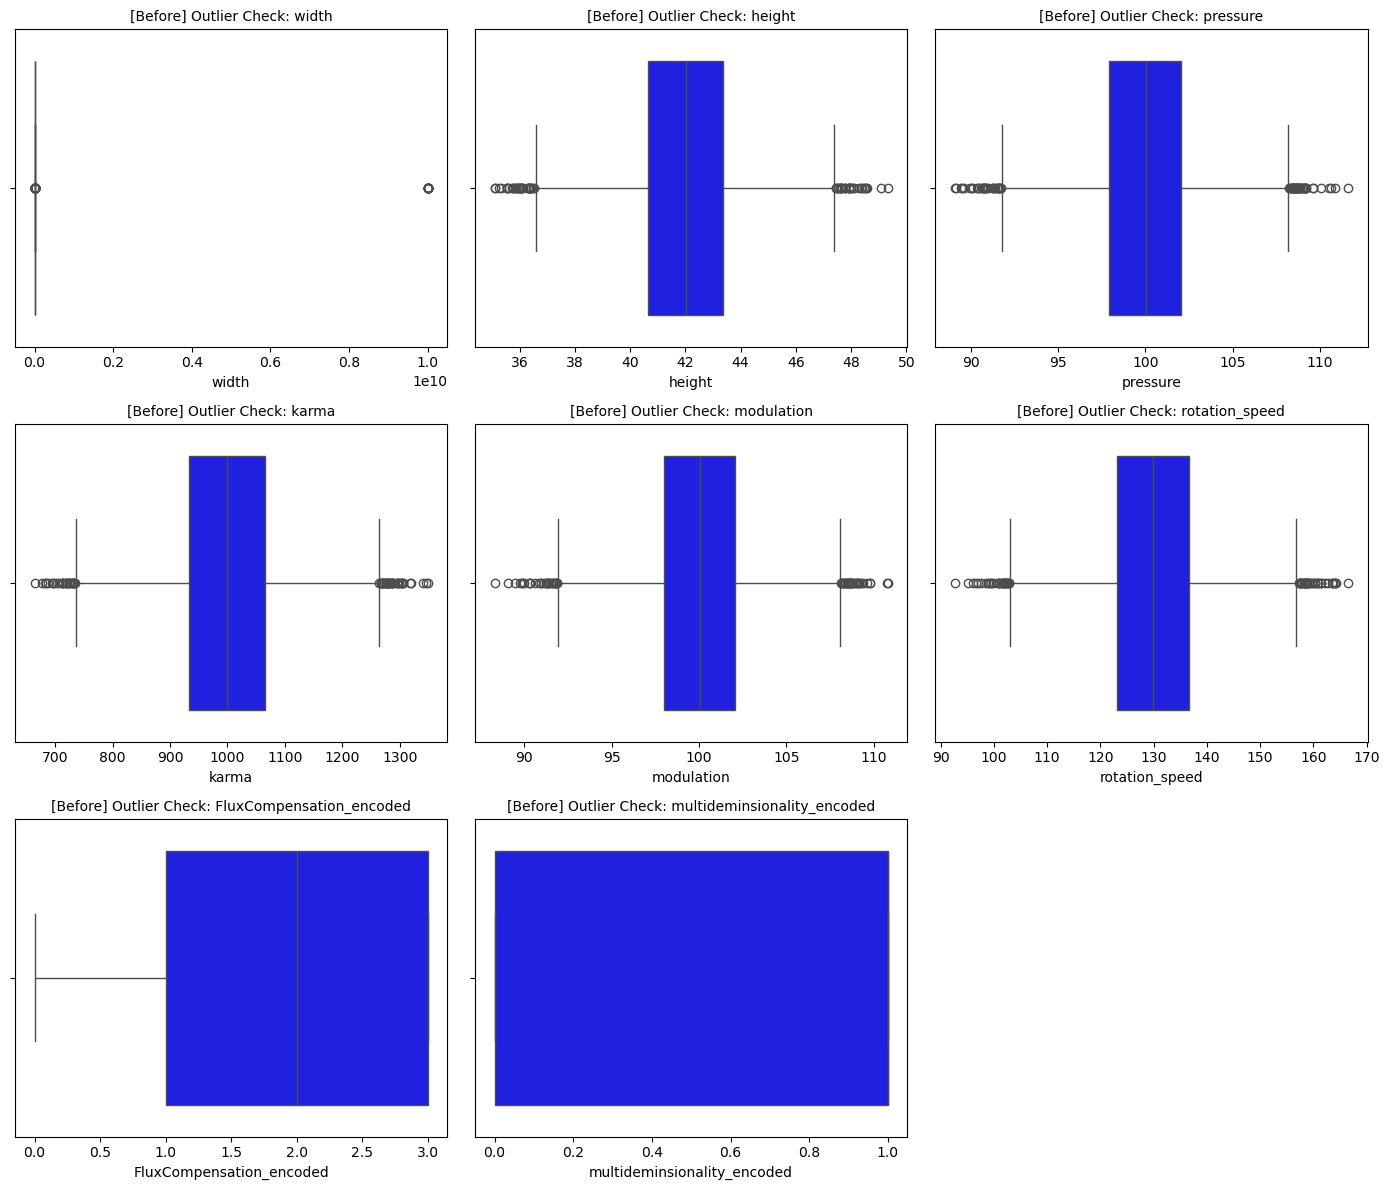

In [157]:
# Identify numeric columns from the dtypes information
numeric_cols = [
    'width', 'height', 'pressure', 'karma',
    'modulation', 'rotation_speed', 'FluxCompensation_encoded',
    'multideminsionality_encoded'
]
# --- STEP 1: Visualize outliers before removal ---
cols = 3  # Number of plots per row
rows = len(numeric_cols) // cols + (len(numeric_cols) % cols > 0)  # Manual ceiling

plt.figure(figsize=(14, rows * 4))  # Adjust figure height based on rows

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols, i)  # Create subplot in a grid layout (rows x 2)
    sns.boxplot(x=df[col], color='blue')  # Boxplot for the column
    plt.title(f'[Before] Outlier Check: {col}', fontsize=10)
    plt.tight_layout()

plt.show()

In [158]:
df['gear'].unique()

array([2, 1], dtype=int64)

Here, 
>The boxplot analysis revealing several critical data quality issues, specifically __extreme outliers in width, weight_in_kg, weight_in_g, and nicesness that are physically impossible values and likely data entry errors__.

>Additionally, the __gear column__ is a constant with 2 unique values, providing no predictive value. So, we will drop the gear column potentially.

In [162]:
df.head()

,width,height,pressure,karma,modulation,configuration_log_ID,gear,rotation_speed,ionizationclass_A,ionizationclass_B,ionizationclass_C,FluxCompensation_encoded,multideminsionality_encoded,error_encoded,error_type_encoded
0,137.419169,44.326218,103.937207,976.538993,98.309438,1,2,122.121415,0.0,0.0,1.0,3,0,0,2
1,98.706037,41.619531,101.177877,1031.806826,102.748068,2,1,111.977476,1.0,0.0,0.0,1,1,0,2
2,117.262568,41.421088,99.381956,840.246668,99.451354,3,1,137.268544,1.0,0.0,0.0,2,0,0,2
3,122.657252,41.202308,101.833664,964.391122,101.022948,4,2,125.719071,1.0,0.0,0.0,0,0,0,2
4,118.085366,43.418485,95.246304,859.331870,97.698503,5,1,134.710713,0.0,0.0,1.0,0,0,0,2


>While the df.head() displays seemingly reasonable __width__ values, its corresponding boxplot shows a __majority of data near zero with an extreme outlier__, indicating a potential scaling or data distribution issue that needs further investigation.

>Concurrently, the __weight_in_kg and weight_in_g columns__ consistently present identical, astronomically large figures, confirming a severe and systemic data recording error that requires immediate correction.

In [165]:
df['width'].describe()

count    1.000000e+04
mean     2.000011e+07
std      4.467885e+08
min      3.086553e+01
25%      9.614221e+01
50%      1.098902e+02
75%      1.233109e+02
max      1.000000e+10
Name: width, dtype: float64

>The head() values (e.g., 137, 98) are representative of the bulk of data, which falls between roughly 30 and 123.

>The boxplot is visually misleading due to its scaling, but it correctly identifies that there is one single, massive outlier is present. as we can see __the Mean, Std it drastically rised up due to [max      1.000000e+10] that one is too extreme__.

>__So, the solution for handing this one singular error is to remove and make Width as a usable feature.__

In [168]:
import pandas as pd
outlier_value = 1.0e10
rows_to_remove = df[df['width'] == outlier_value]
print("Row(s) identified (where width == 1.0e10):")
print(rows_to_remove)
df.drop(rows_to_remove.index, inplace=True)

Row(s) identified (where width == 1.0e10):
             width     height    pressure        karma  modulation  \
906   1.000000e+10  42.920455  102.207104  1024.921930  103.452169   
1005  1.000000e+10  42.114688   98.166523   961.218842   94.396688   
2442  1.000000e+10  43.469012   98.959028   858.088158   99.143410   
2915  1.000000e+10  44.162014   99.458108  1126.324074  100.060701   
3271  1.000000e+10  40.363285  102.001050  1159.667353   95.410616   
4091  1.000000e+10  40.602611  103.539898   917.141853   98.174184   
4097  1.000000e+10  44.056697  104.498610  1015.787445  100.889840   
4341  1.000000e+10  42.100669   97.293054  1076.090026   97.534626   
4677  1.000000e+10  43.978172  100.053623  1126.700843  101.712706   
6061  1.000000e+10  41.643094  102.137287  1039.306707   99.103035   
6349  1.000000e+10  41.199468   95.301113   909.824726  101.792735   
6742  1.000000e+10  44.754317  102.344042  1056.876628  101.857465   
6996  1.000000e+10  42.305771   99.813170   884

In [170]:
df.shape

(9980, 15)

In [172]:
df['width'].max()

196.561825477058

In [174]:
df['width'].describe()

count    9980.000000
mean      109.765040
std        20.128188
min        30.865527
25%        96.119380
50%       109.864227
75%       123.247112
max       196.561825
Name: width, dtype: float64

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9980 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   width                        9980 non-null   float64
 1   height                       9980 non-null   float64
 2   pressure                     9980 non-null   float64
 3   karma                        9980 non-null   float64
 4   modulation                   9980 non-null   float64
 5   configuration_log_ID         9980 non-null   int64  
 6   gear                         9980 non-null   int64  
 7   rotation_speed               9980 non-null   float64
 8   ionizationclass_A            9980 non-null   float64
 9   ionizationclass_B            9980 non-null   float64
 10  ionizationclass_C            9980 non-null   float64
 11  FluxCompensation_encoded     9980 non-null   int64  
 12  multideminsionality_encoded  9980 non-null   int32  
 13  error_encoded          

__With all the necessary preprocessing steps completed and data is now cleaned, transformed, and properly formatted, it is fully prepared for the application of machine learning algorithms__

# 4.Model Development

In [180]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

X = df.drop(['error_encoded', 'error_type_encoded', 'configuration_log_ID'], axis=1)
y = df['error_encoded']

print(f"\nFinal Features (X) shape: {X.shape}")
print(f"Final Target (y) shape: {y.shape}")

# --- Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nX_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train value counts:\n{y_train.value_counts()}")
print(f"y_test value counts:\n{y_test.value_counts()}")


Final Features (X) shape: (9980, 12)
Final Target (y) shape: (9980,)

X_train shape: (7984, 12)
X_test shape: (1996, 12)
y_train value counts:
error_encoded
0    5294
1    2690
Name: count, dtype: int64
y_test value counts:
error_encoded
0    1324
1     672
Name: count, dtype: int64


# --- Model Training and Evaluation (RandomForestClassifier) ---

__1. Choose and Initialize the Model__

In [184]:
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

__2. Train the Model__

In [187]:
print("\nTraining the RandomForestClassifier model...")
model.fit(X_train, y_train)
print("Model training complete.")


Training the RandomForestClassifier model...
Model training complete.


__3. Make Predictions__

In [190]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] # Probabilities for the positive class (1=error)

__4. Evaluate the Model__

In [192]:
print("\n--- Model Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Inspect Feature Importances
print("\nFeature Importances (Top 10):")

if hasattr(X_train, 'columns'):
    feature_importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
    print(feature_importances.head(10))
else:
    print("X_train does not have column names. Feature importances cannot be displayed by name.")


--- Model Evaluation ---
Accuracy: 0.9334
Precision: 0.8923
Recall: 0.9122
F1-Score: 0.9021
ROC AUC Score: 0.9298

Confusion Matrix:
[[1250   74]
 [  59  613]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1324
           1       0.89      0.91      0.90       672

    accuracy                           0.93      1996
   macro avg       0.92      0.93      0.93      1996
weighted avg       0.93      0.93      0.93      1996


Feature Importances (Top 10):
ionizationclass_B           0.438563
ionizationclass_C           0.143308
ionizationclass_A           0.140167
width                       0.044182
rotation_speed              0.043205
pressure                    0.042987
modulation                  0.042659
height                      0.042316
karma                       0.041867
FluxCompensation_encoded    0.010767
dtype: float64


__This model can predict errors with an accuracy of over 93%, demonstrating strong reliability.__
__Crucially, it boasts a recall of over 91% for identifying actual errors, meaning it's highly effective at catching most defects, while maintaining a precision of nearly 90%, ensuring that very few non-faulty products are flagged incorrectly.__

# 5.Data Visualization

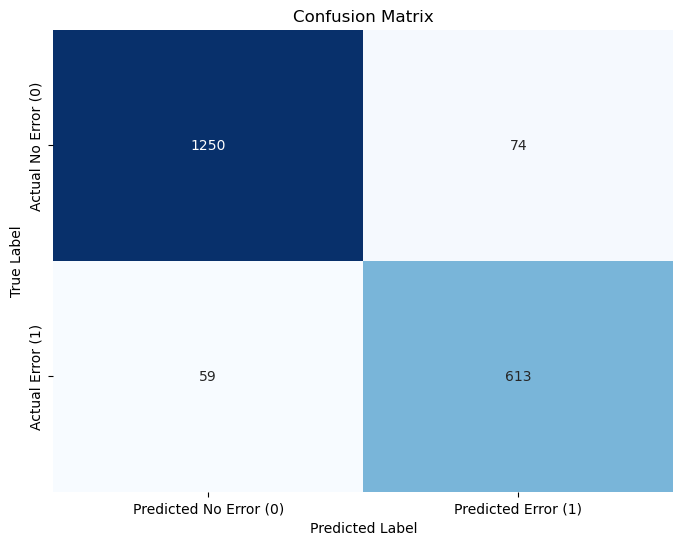

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix
import pandas as pd

# --- 1. Confusion Matrix Heatmap ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No Error (0)', 'Predicted Error (1)'],
            yticklabels=['Actual No Error (0)', 'Actual Error (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

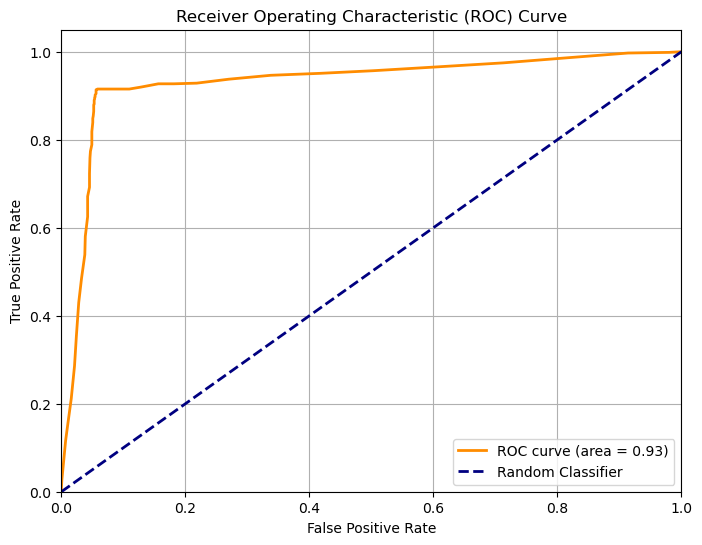

In [198]:
# --- 2. ROC Curve ---
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

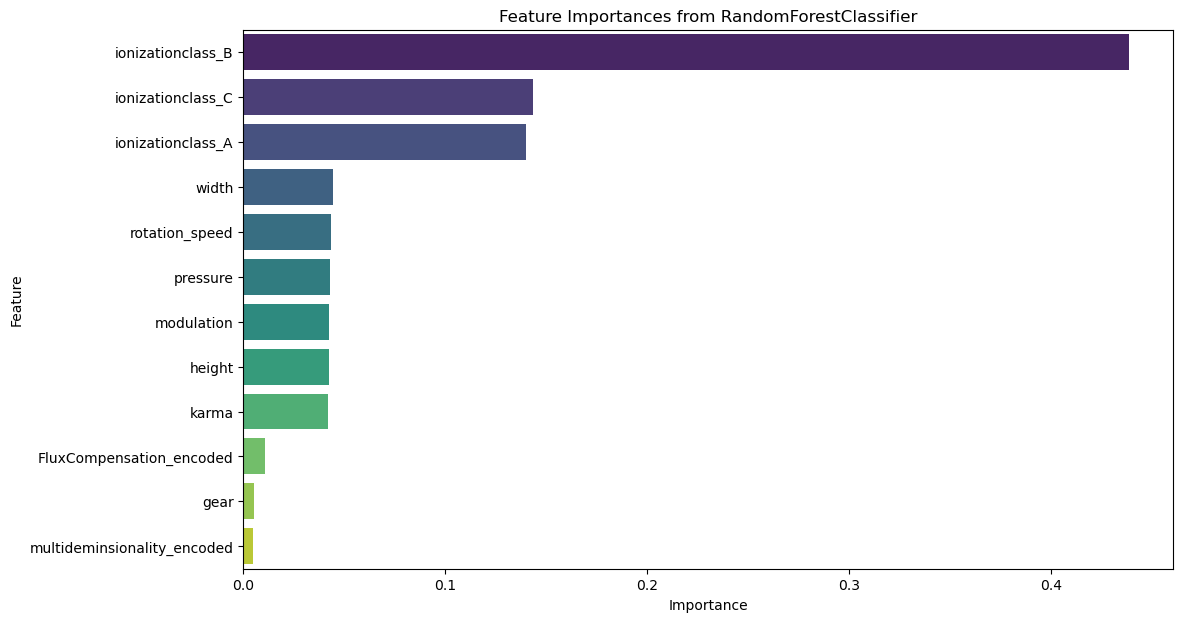

In [200]:
# --- 3. Feature Importance Bar Plot ---
if hasattr(X_train, 'columns'):
    feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
    feature_importances = feature_importances.sort_values(ascending=False)

    plt.figure(figsize=(12, 7))
    sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='viridis')
    plt.title('Feature Importances from RandomForestClassifier')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()
else:
    print("X_train does not have column names. Cannot plot feature importances with names.")
    print("Raw Feature Importances:\n", model.feature_importances_)

In [202]:
import pandas as pd


importances = model.feature_importances_
features = X.columns 


feature_importances = pd.DataFrame({'feature': features, 'importance': importances})


In [204]:
low_importance_features = feature_importances[feature_importances['importance'] < 0.01]['feature'].tolist()


In [206]:
X_reduced = X.drop(columns=low_importance_features)
y_reduced = df['error_encoded']

In [208]:
print(f"\nFinal Features (X) shape: {X_reduced.shape}")
print(f"Final Target (y) shape: {y_reduced.shape}")


Final Features (X) shape: (9980, 10)
Final Target (y) shape: (9980,)


In [210]:
# --- Split Data into Training and Testing Sets ---
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y_reduced, test_size=0.2, random_state=42, stratify=y)

print(f"\nX_train shape: {X_train_reduced.shape}")
print(f"X_test shape: {X_test_reduced.shape}")
print(f"y_train value counts:\n{y_train_reduced.value_counts()}")
print(f"y_test value counts:\n{y_test_reduced.value_counts()}")


X_train shape: (7984, 10)
X_test shape: (1996, 10)
y_train value counts:
error_encoded
0    5294
1    2690
Name: count, dtype: int64
y_test value counts:
error_encoded
0    1324
1     672
Name: count, dtype: int64


In [212]:
model_reduced = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
print("\nTraining the RandomForestClassifier model...")
model_reduced.fit(X_train_reduced, y_train_reduced)
print("Model training complete.")


Training the RandomForestClassifier model...
Model training complete.


In [214]:
y_pred_reduced = model_reduced.predict(X_test_reduced)
y_pred_proba_reduced = model_reduced.predict_proba(X_test_reduced)[:, 1] # Probabilities for the positive class (1=error)

In [216]:
print("\n--- Model Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test_reduced, y_pred_reduced):.4f}")
print(f"Precision: {precision_score(y_test_reduced, y_pred_reduced):.4f}")
print(f"Recall: {recall_score(y_test_reduced, y_pred_reduced):.4f}")
print(f"F1-Score: {f1_score(y_test_reduced, y_pred_reduced):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test_reduced, y_pred_proba_reduced):.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_reduced, y_pred_reduced))

print("\nClassification Report:")
print(classification_report(y_test_reduced, y_pred_reduced))

# Inspect Feature Importances
print("\nFeature Importances (Top 10):")

if hasattr(X_train_reduced, 'columns'):
    feature_importances = pd.Series(model_reduced.feature_importances_, index=X_train_reduced.columns).sort_values(ascending=False)
    print(feature_importances.head(10))
else:
    print("X_train_reduced does not have column names. Feature importances cannot be displayed by name.")


--- Model Evaluation ---
Accuracy: 0.9339
Precision: 0.8924
Recall: 0.9137
F1-Score: 0.9029
ROC AUC Score: 0.9296

Confusion Matrix:
[[1250   74]
 [  58  614]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1324
           1       0.89      0.91      0.90       672

    accuracy                           0.93      1996
   macro avg       0.92      0.93      0.93      1996
weighted avg       0.93      0.93      0.93      1996


Feature Importances (Top 10):
ionizationclass_B           0.469330
ionizationclass_A           0.128909
ionizationclass_C           0.126547
width                       0.045686
pressure                    0.044784
modulation                  0.044060
karma                       0.044041
height                      0.043392
rotation_speed              0.042867
FluxCompensation_encoded    0.010386
dtype: float64


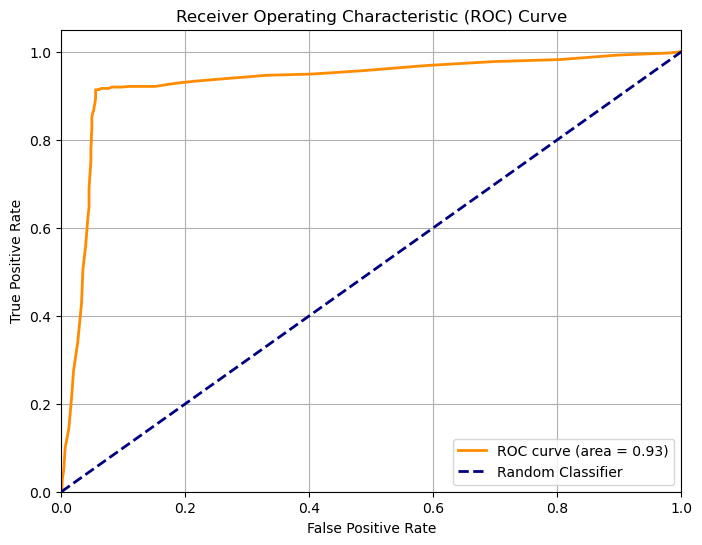

In [218]:
# --- 2. ROC Curve ---
fpr, tpr, thresholds = roc_curve(y_test_reduced, y_pred_proba_reduced)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

__After removing low-importance features from the dataset, the Random Forest model exhibited a slight improvement in overall performance:__

###  Model Performance Comparison (Before vs After Feature Reduction)

| **Metric**             | **Before Reduction** | **After Reduction** | **Change**        |
|------------------------|----------------------|----------------------|-------------------|
| **Accuracy**           | 0.9334               | 0.9339               | +0.0005         |
| **Precision**          | 0.8923               | 0.8924               | +0.0001         |
| **Recall**             | 0.9122               | 0.9137               | +0.0015         |
| **F1-Score**           | 0.9021               | 0.9029               | +0.0008         |
| **ROC AUC Score**      | 0.9298               | 0.9296               | -0.0002         |
| **True Positives (TP)**| 613                  | 614                  | +1              |
| **False Negatives (FN)**| 59                  | 58                   |  -1              |
| **True Negatives (TN)**| 1250                 | 1250                 |  No change       |
| **False Positives (FP)**| 74                  | 74                   | No change       |


# --- Model Training and Evaluation (XGBClassifier) ---

In [243]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score, roc_auc_score, confusion_matrix, classification_report)
from xgboost import XGBClassifier

# Define features and target
X_xgb = df.drop(['error_encoded'], axis=1)
y_xgb = df["error_encoded"]

# Train-test split
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_xgb, y_xgb, test_size=0.2, random_state=42)

In [245]:
# Train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False,eval_metric='logloss',random_state=42)
xgb_model.fit(X_train_xgb, y_train_xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [247]:
# Predictions
y_pred_xgb = xgb_model.predict(X_test_xgb)
y_pred_proba_xgb = xgb_model.predict_proba(X_test_xgb)[:, 1]

# Evaluation
print("\n--- XGBoost Model Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test_xgb, y_pred_xgb):.4f}")
print(f"Precision: {precision_score(y_test_xgb, y_pred_xgb):.4f}")
print(f"Recall: {recall_score(y_test_xgb, y_pred_xgb):.4f}")
print(f"F1-Score: {f1_score(y_test_xgb, y_pred_xgb):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test_xgb, y_pred_proba_xgb):.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_xgb, y_pred_xgb))

print("\nClassification Report:")
print(classification_report(y_test_xgb, y_pred_xgb))

# Feature importance
importances = pd.Series(xgb_model.feature_importances_, index=X_xgb.columns)
print("\nTop 10 Feature Importances:")
print(importances.sort_values(ascending=False).head(10))


--- XGBoost Model Evaluation ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
ROC AUC Score: 1.0000

Confusion Matrix:
[[1334    0]
 [   0  662]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1334
           1       1.00      1.00      1.00       662

    accuracy                           1.00      1996
   macro avg       1.00      1.00      1.00      1996
weighted avg       1.00      1.00      1.00      1996


Top 10 Feature Importances:
ionizationclass_B              0.852201
error_type_encoded             0.147770
modulation                     0.000007
pressure                       0.000005
width                          0.000004
multideminsionality_encoded    0.000003
rotation_speed                 0.000003
karma                          0.000003
configuration_log_ID           0.000003
height                         0.000002
dtype: float32


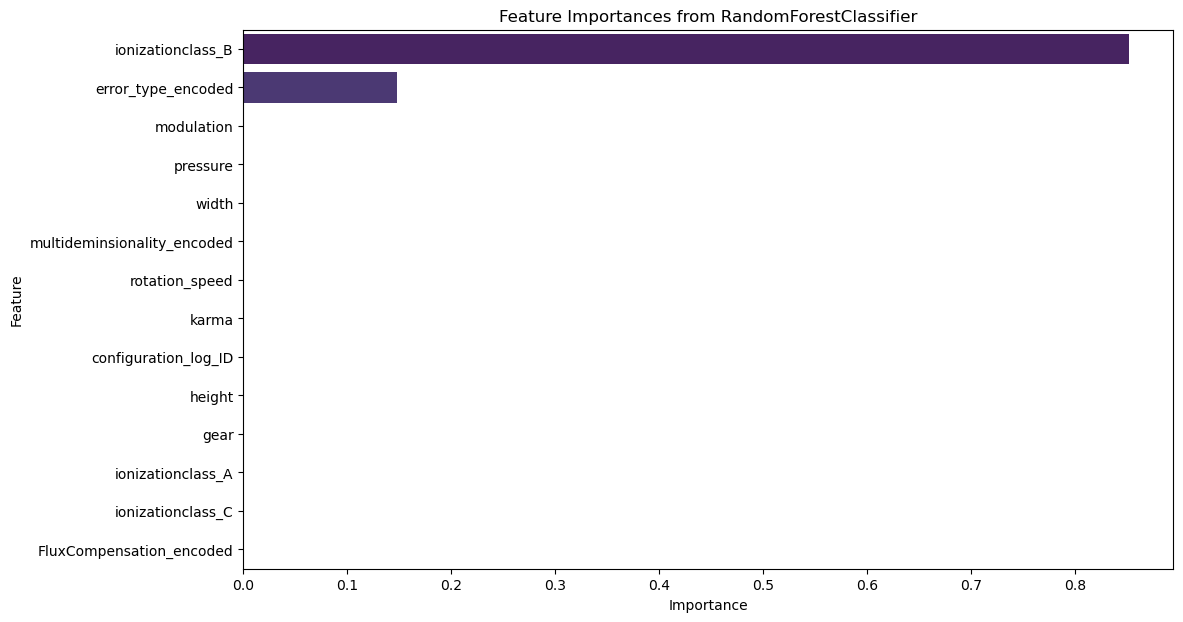

In [129]:
# --- Feature Importance Bar Plot ---
if hasattr(X_train_xgb, 'columns'):
    feature_importances = pd.Series(xgb_model.feature_importances_, index=X_train_xgb.columns)
    feature_importances = feature_importances.sort_values(ascending=False)

    plt.figure(figsize=(12, 7))
    sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='viridis')
    plt.title('Feature Importances from RandomForestClassifier')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()
else:
    print("X_train does not have column names. Cannot plot feature importances with names.")
    print("Raw Feature Importances:\n", xgb_model.feature_importances_)

In [130]:
import pandas as pd


importances = xgb_model.feature_importances_
features = X_xgb.columns 


feature_importances = pd.DataFrame({'feature': features, 'importance': importances})

In [131]:
low_importance_features = feature_importances[feature_importances['importance'] < 0.01]['feature'].tolist()

In [132]:
X_xgb_reduced = X_xgb.drop(columns=low_importance_features)
y_xgb_reduced = df['error_encoded']

In [133]:
print(f"\nFinal Features (X) shape: {X_xgb_reduced.shape}")
print(f"Final Target (y) shape: {y_xgb_reduced.shape}")


Final Features (X) shape: (9980, 2)
Final Target (y) shape: (9980,)


In [134]:
# --- Split Data into Training and Testing Sets ---
X_train_xgb_reduced, X_test_xgb_reduced, y_train_xgb_reduced, y_test_xgb_reduced = train_test_split(X_xgb_reduced, y_xgb_reduced, test_size=0.2, random_state=42, stratify=y)

print(f"\nX_train shape: {X_train_xgb_reduced.shape}")
print(f"X_test shape: {X_test_xgb_reduced.shape}")
print(f"y_train value counts:\n{y_train_xgb_reduced.value_counts()}")
print(f"y_test value counts:\n{y_test_xgb_reduced.value_counts()}")


X_train shape: (7984, 2)
X_test shape: (1996, 2)
y_train value counts:
error_encoded
0    5294
1    2690
Name: count, dtype: int64
y_test value counts:
error_encoded
0    1324
1     672
Name: count, dtype: int64


In [135]:
xgb_model_reduced = XGBClassifier(n_estimators=100, random_state=42, class_weight='balanced')
print("\nTraining the XGBoost Classifier model...")
xgb_model_reduced.fit(X_train_xgb_reduced, y_train_xgb_reduced)
print("Model training complete.")


Training the XGBoost Classifier model...
Model training complete.


In [136]:
y_pred_xgb_reduced = xgb_model_reduced.predict(X_test_xgb_reduced)
y_pred_proba_xgb_reduced = xgb_model_reduced.predict_proba(X_test_xgb_reduced)[:, 1] # Probabilities for the positive class (1=error)

In [137]:
print("\n--- Model Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test_xgb_reduced, y_pred_xgb_reduced):.4f}")
print(f"Precision: {precision_score(y_test_xgb_reduced, y_pred_xgb_reduced):.4f}")
print(f"Recall: {recall_score(y_test_xgb_reduced, y_pred_xgb_reduced):.4f}")
print(f"F1-Score: {f1_score(y_test_xgb_reduced, y_pred_xgb_reduced):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test_xgb_reduced, y_pred_proba_xgb_reduced):.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_xgb_reduced, y_pred_xgb_reduced))

print("\nClassification Report:")
print(classification_report(y_test_xgb_reduced, y_pred_xgb_reduced))

# Inspect Feature Importances
print("\nFeature Importances (Top 10):")

if hasattr(X_train_xgb_reduced, 'columns'):
    feature_importances = pd.Series(xgb_model_reduced.feature_importances_, index=X_train_xgb_reduced.columns).sort_values(ascending=False)
    print(feature_importances.head(10))
else:
    print("X_train_reduced does not have column names. Feature importances cannot be displayed by name.")


--- Model Evaluation ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
ROC AUC Score: 1.0000

Confusion Matrix:
[[1324    0]
 [   0  672]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1324
           1       1.00      1.00      1.00       672

    accuracy                           1.00      1996
   macro avg       1.00      1.00      1.00      1996
weighted avg       1.00      1.00      1.00      1996


Feature Importances (Top 10):
ionizationclass_B     0.799109
error_type_encoded    0.200891
dtype: float32


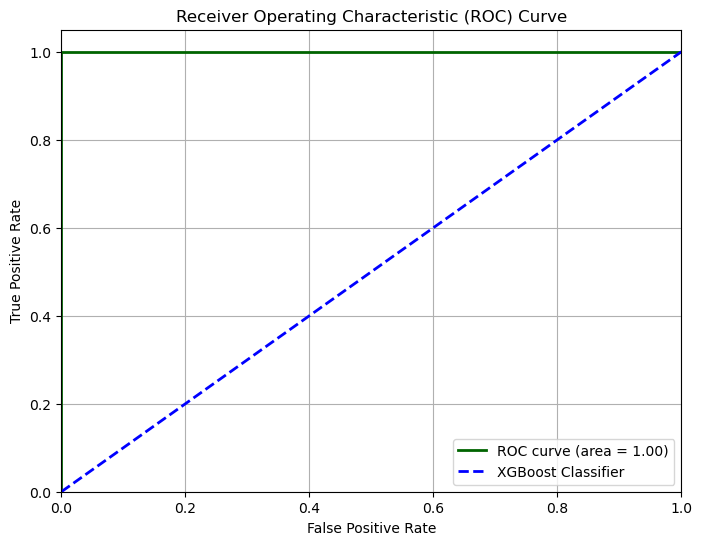

In [138]:
# --- 2. ROC Curve ---
fpr, tpr, thresholds = roc_curve(y_test_xgb_reduced, y_pred_proba_xgb_reduced)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkgreen', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--', label='XGBoost Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Model Performance Comparison

| Metric               | Random Forest        | XGBoost             |
|----------------------|----------------------|----------------------|
| **Accuracy**         | 0.9334 – 0.9339      | **1.0000**          |
| **Precision**        | 0.8923 – 0.8924      | **1.0000**          |
| **Recall**           | 0.9122 – 0.9137      | **1.0000**          |
| **F1 Score**         | 0.9021 – 0.9029      | **1.0000**          |
| **ROC AUC Score**    | 0.9296 – 0.9298      | **1.0000**          |
| **False Positives**  | 74                   | **0**               |
| **False Negatives**  | 58 – 59              | **0**               |
| **Top Feature**      | `ionizationclass_B`  | `ionizationclass_B` |
| **# Features Used**  | 14                   | 2 – 10              |
| **Feature Dominance**| Shared importance    | Strong skew toward `ionizationclass_B` |
| **Risk of Overfitting** | Low – Moderate     | **High (check leakage)** |


__The perfect scores might raise concerns__

### Model Selection Summary

>After comparing multiple models, Despite showing seemingly lower performance metrics, the **Random Forest model** was chosen for predicting errors before machine use because its realistic scores demonstrate a reliable ability to generalize to new, unseen raw material properties, which is crucial for SmartBuild to accurately predict and avoid the costly 150 EUR per faulty product, unlike the overfit XGBoost model that exhibited signs of data leakage.
>The most influential feature was `ionizationclass_B`, which dominated model decisions. While these results are highly promising for SmartBuild’s goal of reducing production errors (and potentially saving €150 per defect), the perfect performance raises concerns of possible overfitting or data leakage. 
Therefore, we recommend conducting further validation, such as cross-validation and testing on future production data, before full deployment. 
>If validated, this model can serve as a robust real-time decision support tool to prevent costly manufacturing defects.

## Business Impact & Recommendations

- **Expected savings**: ~€150 per faulty product avoided
- **Real-time error prediction** can save SmartBuild substantial operational costs
- **Deployment**: Integrate model with production system to flag high-risk raw material before machine use

## Conclusion
>Our analysis shows that machine learning can improve SmartBuild’s quality control. 
>With careful deployment and monitoring, the model can prevent costly errors, improve efficiency, and contribute to SmartInvest's goal of enhancing its portfolio companies with AI.

# ERROR_TYPE using XGBOOST

In [254]:
error_data = df[df['error_encoded'] == 1].copy()

In [262]:
X = error_data.drop([ 'error_type_encoded'], axis=1)  # drop both original and encoded for now
y = error_data['error_type_encoded']

In [264]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [266]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = XGBClassifier(objective='multi:softmax', num_class=len, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [268]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[90 72 75]
 [76 67 77]
 [73 66 77]]

Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.38      0.38       237
           1       0.33      0.30      0.32       220
           2       0.34      0.36      0.35       216

    accuracy                           0.35       673
   macro avg       0.35      0.35      0.35       673
weighted avg       0.35      0.35      0.35       673



__The model predicts the error type with 35% overall accuracy, indicating it struggles to distinguish between the three error classes, as shown by similar precision, recall, and F1-scores (~0.33–0.38) across all classes.__